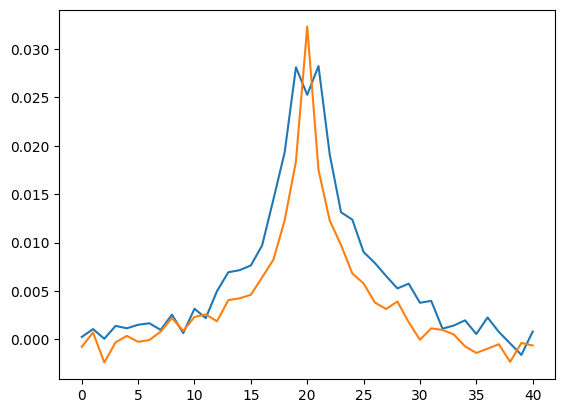

In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt
root = '/home/xiaoxinyu/snse/experiments/'
path = root + '1024/1024_eqfdbp_step25_dtaps301_ntaps41_pretrainD1_trainD1/models/89.pth'
param = torch.load(path, map_location='cpu')
t = param['model_param']['nonlinear.Nkernel.0']

plt.plot(t[0,0])
plt.plot(t[0,1])

In [3]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt

root = '/home/xiaoxinyu/pkufiber/experiments/'
path = root + '1025/1025_eqsnsedbp_effective_step20_dtaps401_ntaps81_pretrainD1_trainD1_D160w_lr1e-4_fixfwm5/models/89.pth'
param = torch.load(path, map_location='cpu')

xpm_weight = param['model_param']['nonlinear.ixpm_conv1d.0.conv.weight'][0,0]
fwm_weight = param['model_param']['nonlinear.fwm_filter.conv.conv1d_r.weight'] + 1j*param['model_param']['nonlinear.fwm_filter.conv.conv1d_i.weight']

print(fwm_weight.shape)
print(xpm_weight.shape)

torch.Size([10, 1, 81])
torch.Size([81])


/tmp/ipykernel_3446980/105715078.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(np.abs(fwm_weight[i,0]))


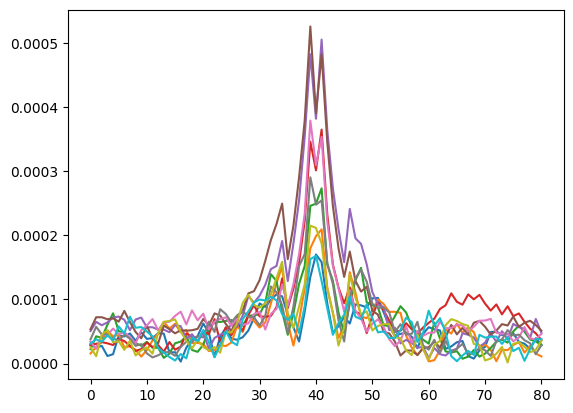

In [4]:
for i in range(fwm_weight.shape[0]):
    plt.plot(np.abs(fwm_weight[i,0]))

In [5]:
S = []
kernel = []
K = 5
L = 40
for m in range(-L, L+1):
    for n in range(-K, K+1):
        S.append((m,n))
        if n == 0:
            kernel.append(xpm_weight[m + L])
        elif n < 0:
            kernel.append(fwm_weight[n+K,0, m + L])
        else:
            kernel.append(fwm_weight[n+K-1,0, m + L])

model30.pth loaded.


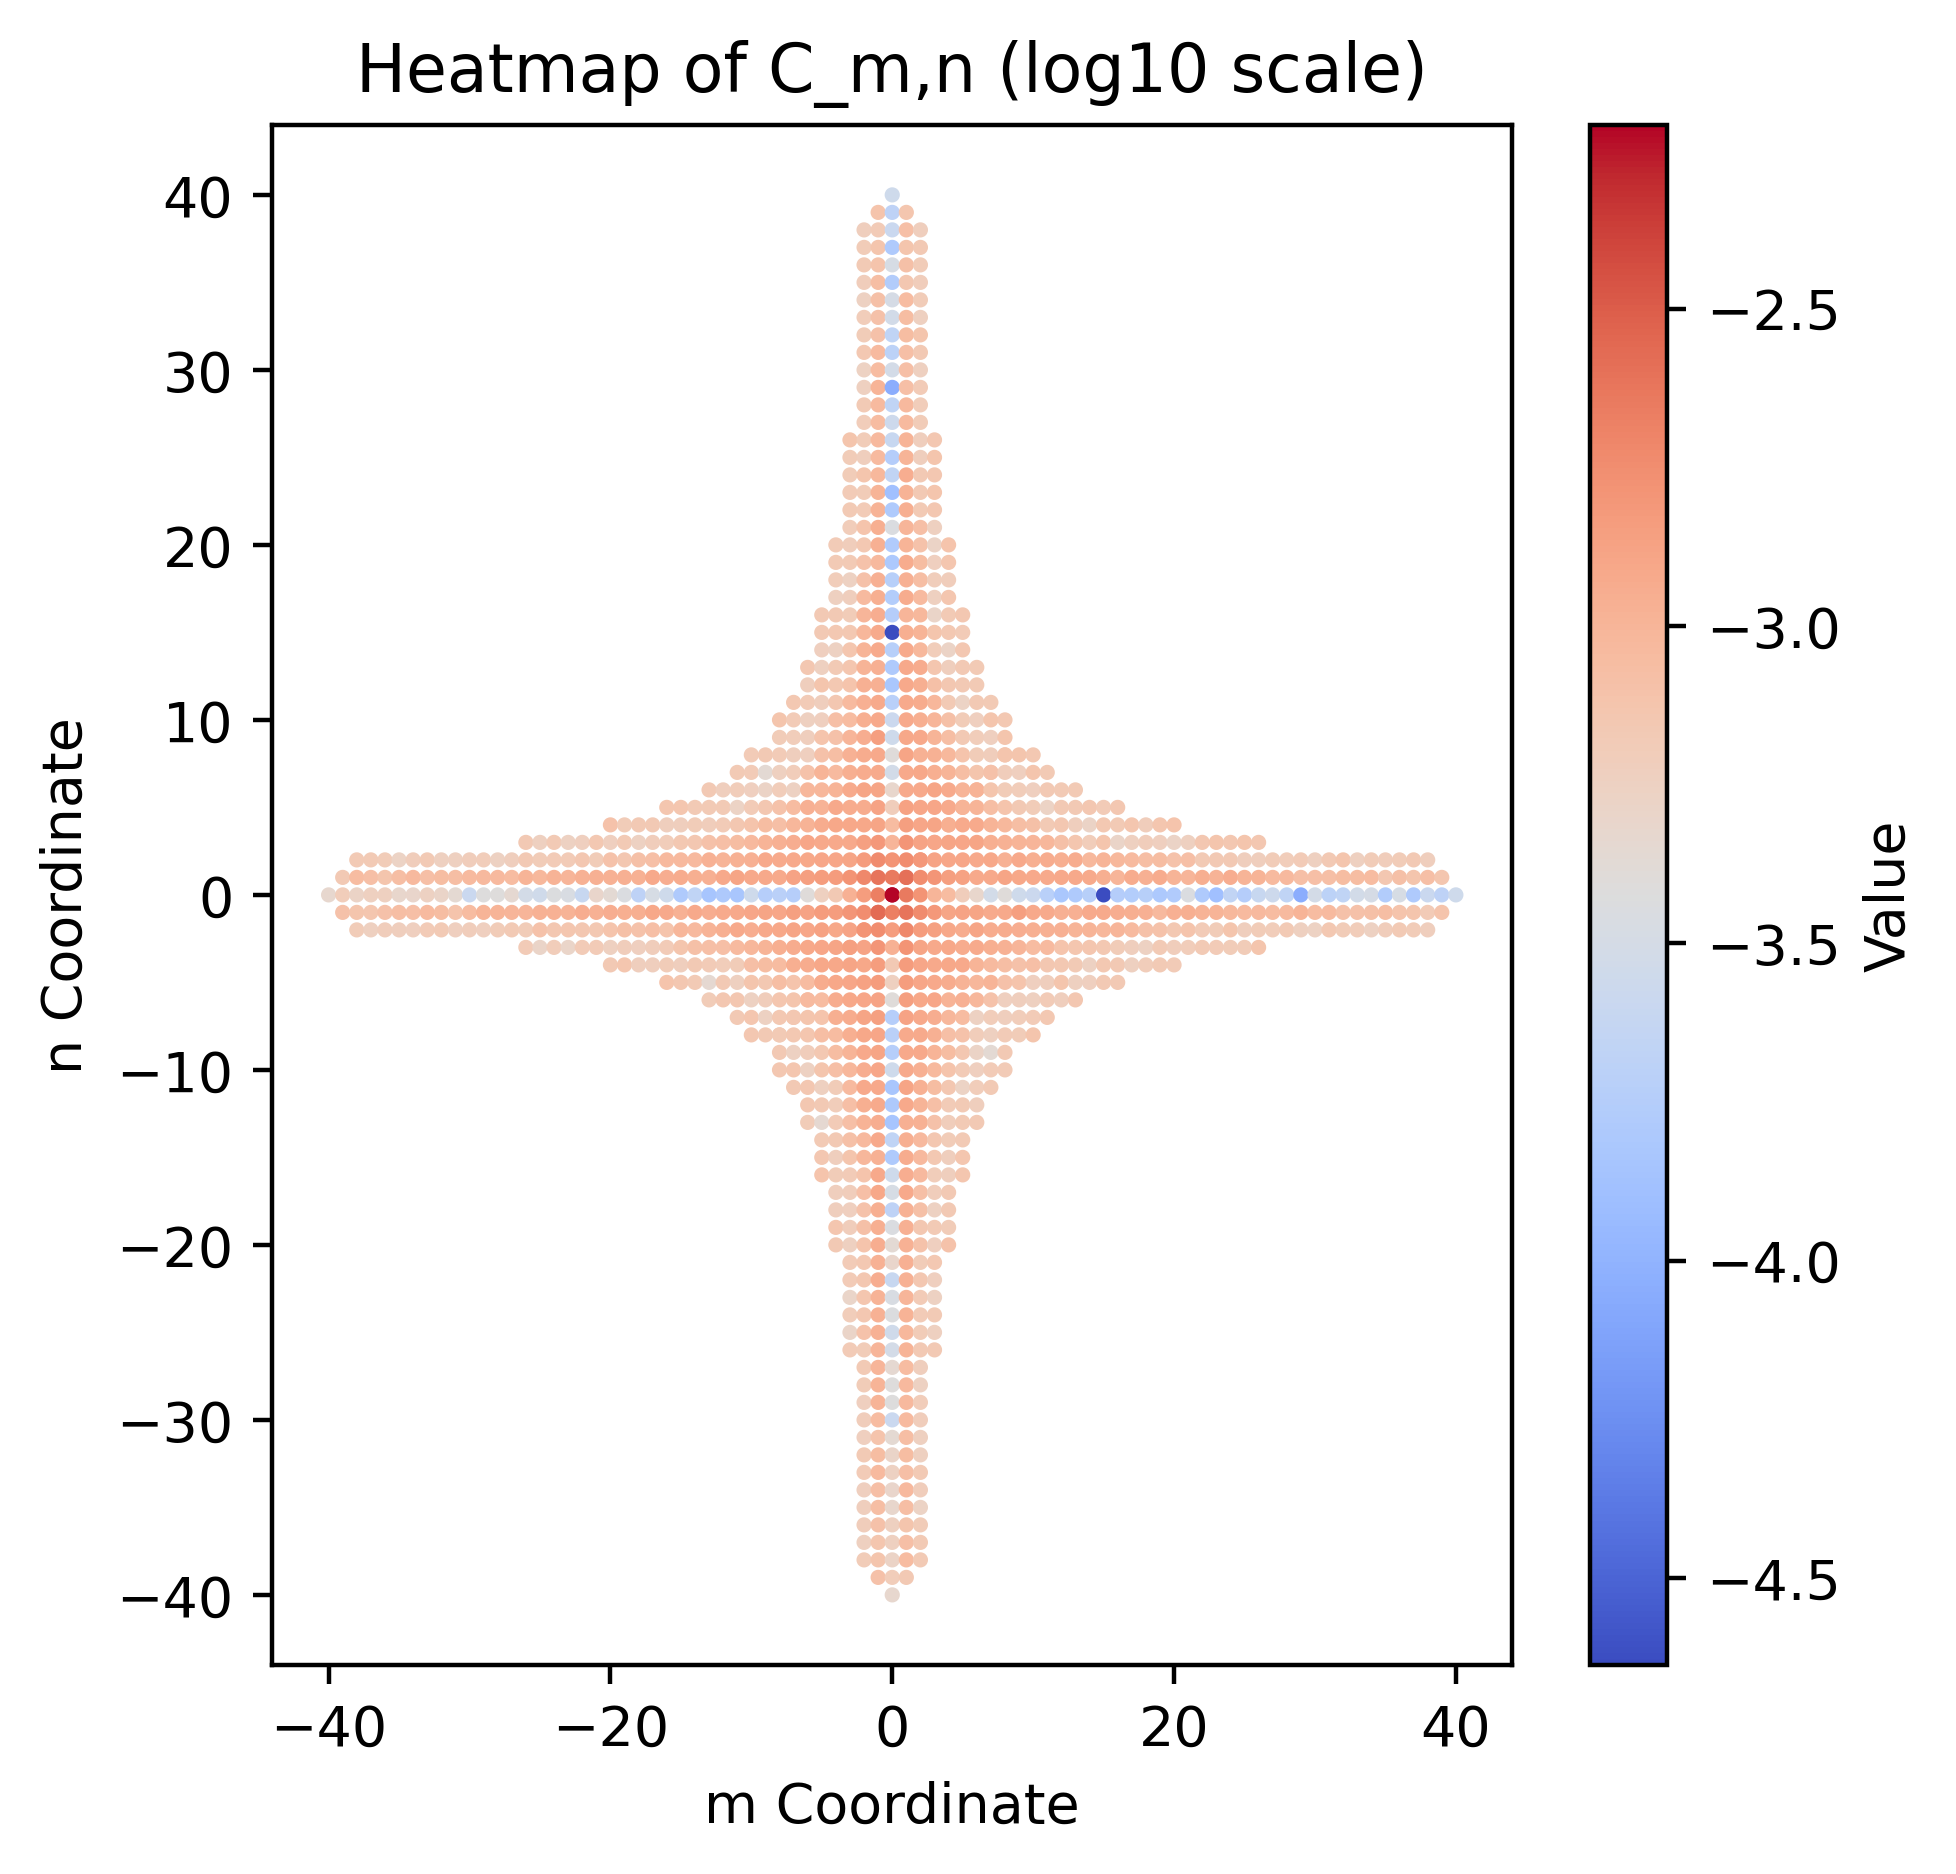

In [6]:
from scripts.test_eq import  load_latest_model 
import pkufiber.dsp.nonlinear_compensation.pbc as pbc

def weight2tensor(fc):
    c = fc.real.weight + 1j * fc.imag.weight
    return c.cpu().detach().squeeze()

root = '/home/xiaoxinyu/snse/experiments/'
model = load_latest_model(root +'1023/1023_pbc_M81_rho2')
c = weight2tensor(model.PBC.nn[0])
pbc.show_pbc(c, model.PBC.features.index, dpi=400)
# plt.title(r'$S_{pbc}: \rho=2, L=40$')

plt.savefig('fig/pbc.png')

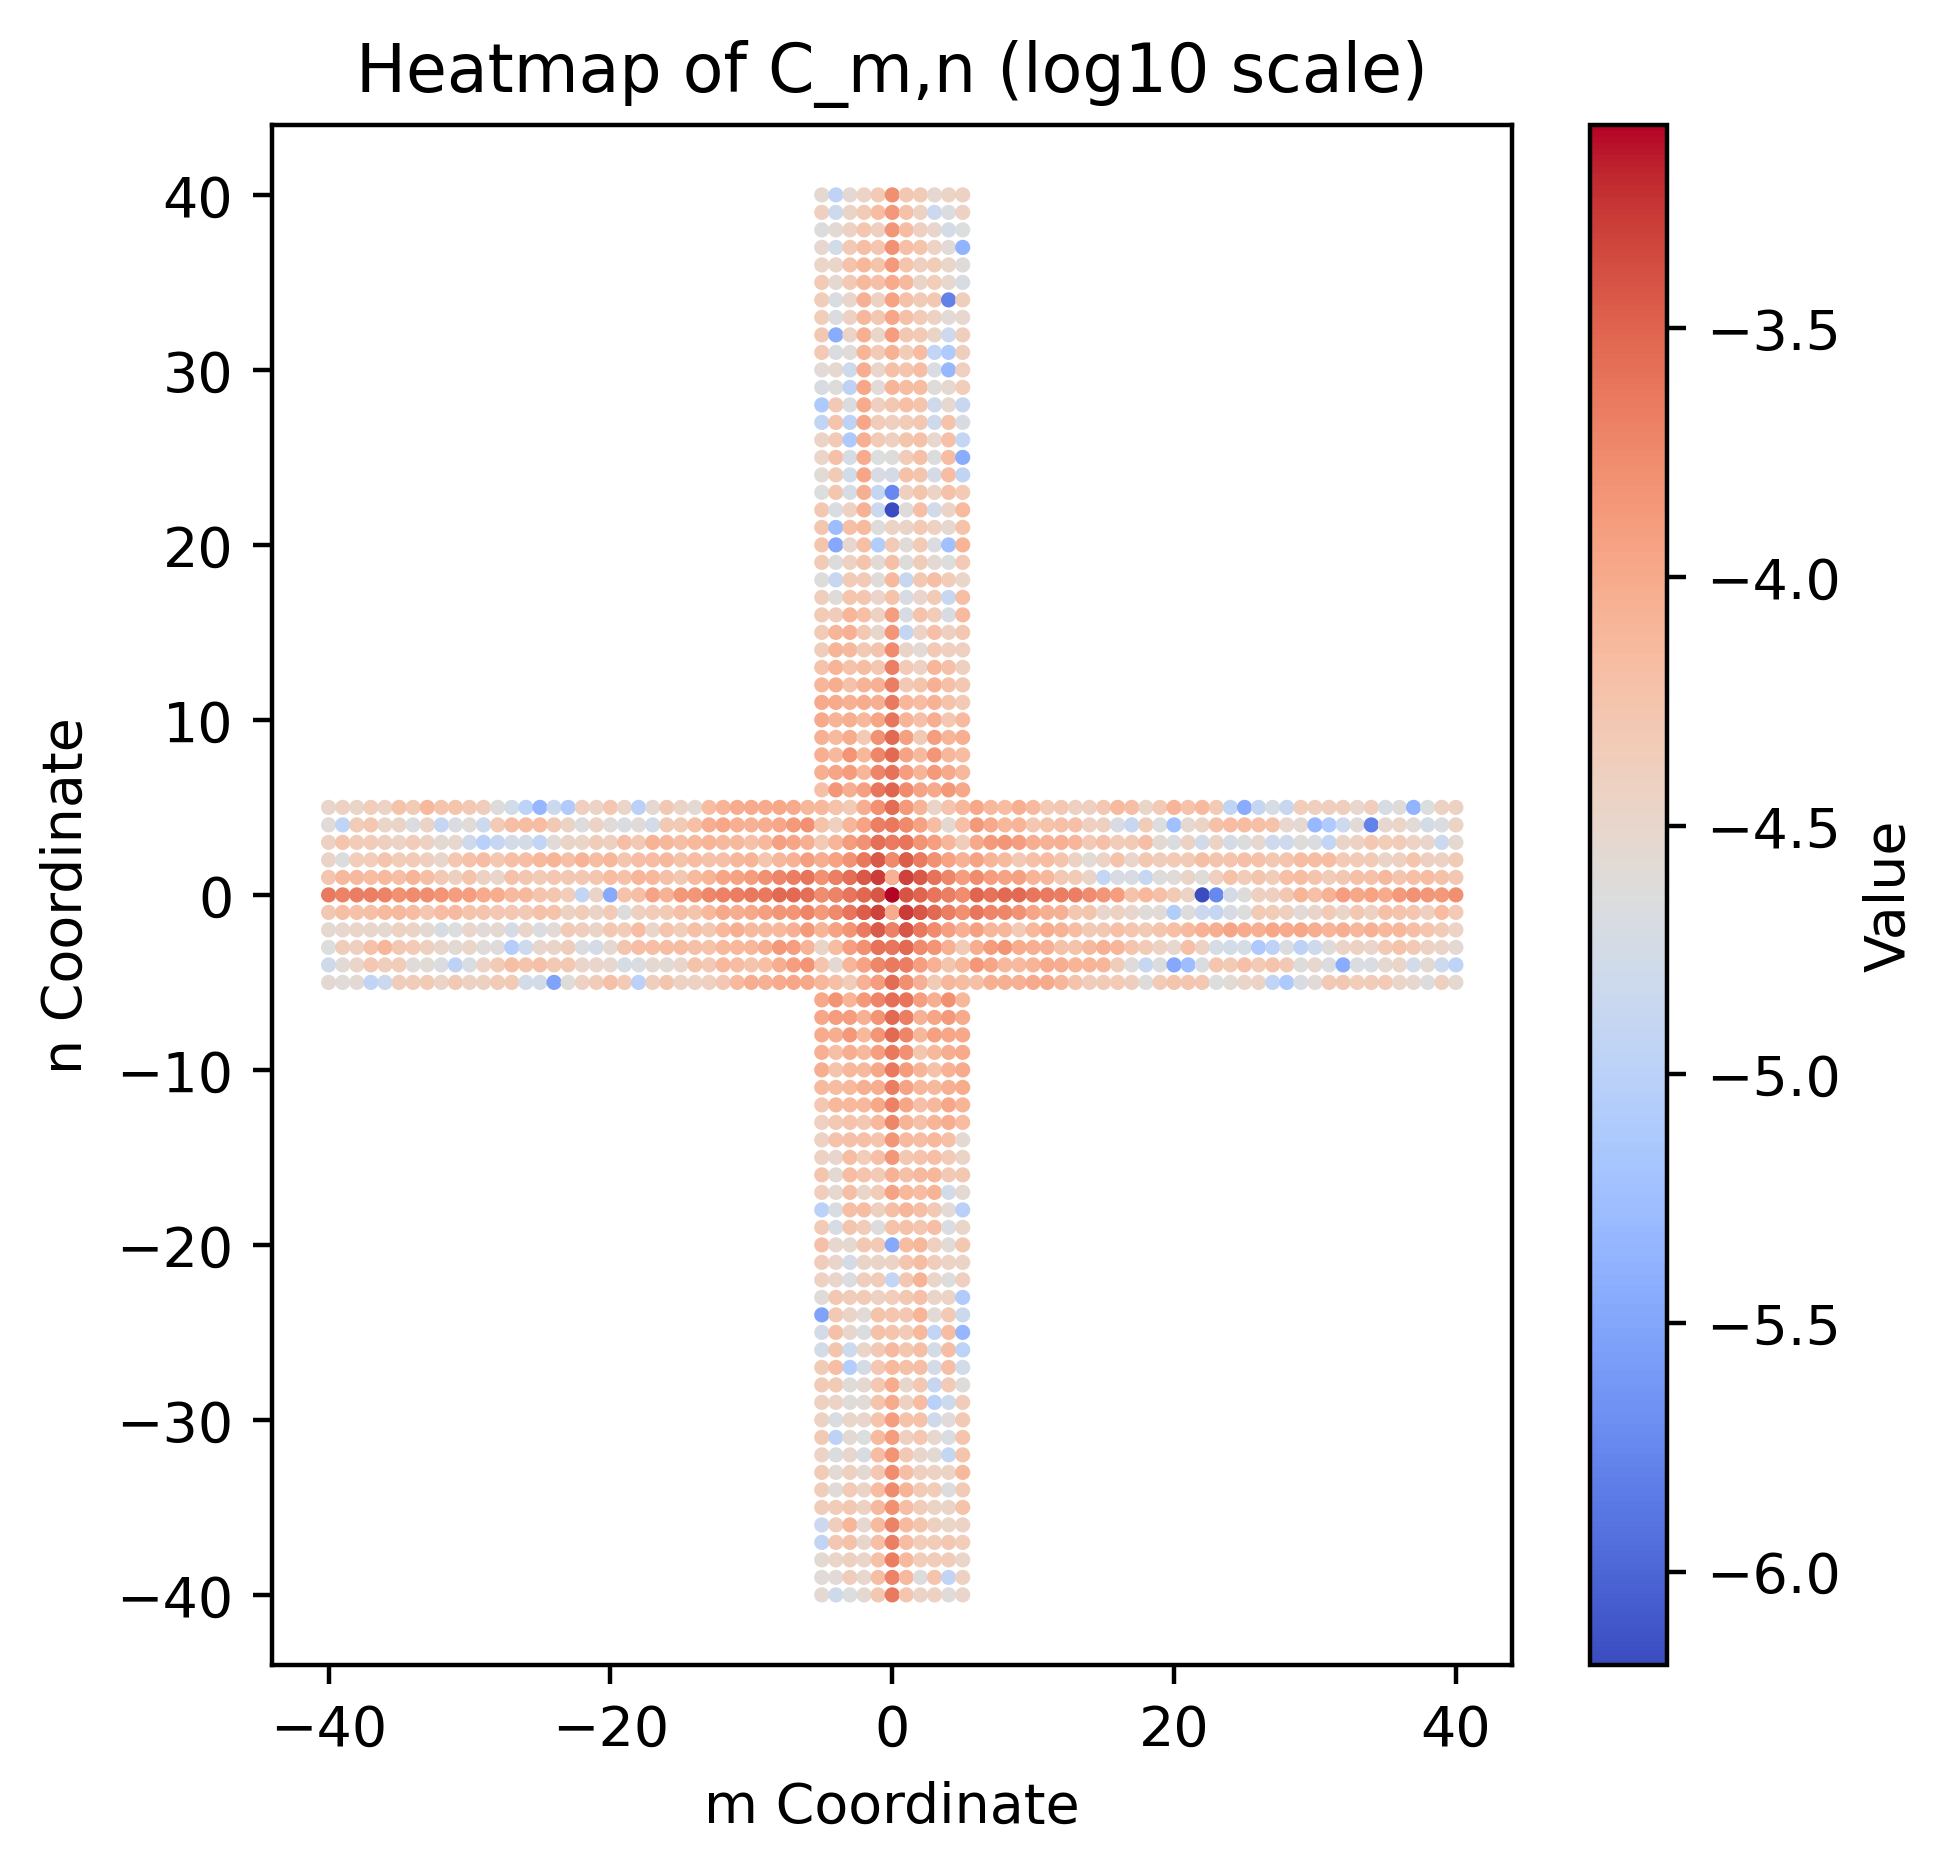

In [8]:
pbc.show_pbc(torch.tensor(kernel), S, dpi=400)
plt.savefig('fig/snse_coeff.png')